In [1]:
from google.colab import files

# آپلود فایل kaggle.json
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sinamollazadeh","key":"1d15a56cccb344622b21f1621c0d2cc3"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
!unzip imdb-dataset-of-50k-movie-reviews.zip

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 62% 16.0M/25.7M [00:00<00:00, 163MB/s]
100% 25.7M/25.7M [00:00<00:00, 205MB/s]
Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [5]:
# بارگذاری فایل CSV
import numpy as np
import pandas as pd
data = pd.read_csv("IMDB Dataset.csv")

# نمایش چند نمونه
print(data.head())

# بررسی اطلاعات کلی
print(data.info())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


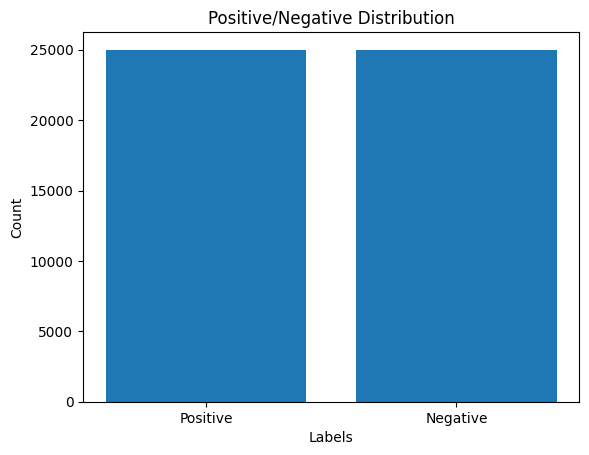

In [6]:
import matplotlib.pyplot as plt

Num_of_positive=data['sentiment'].value_counts().positive
Num_of_negative=data['sentiment'].value_counts().negative
labels = ['Positive', 'Negative']
nums = [Num_of_positive, Num_of_negative]

plt.bar(labels, nums)
plt.title('Positive/Negative Distribution')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

Counting the Words in the Dataset is Finished Within 3.901050329208374 Seconds
5820944 Words Within Positive Sentiments Which is 0.5036596359858192
5736353 Words Within Negative Sentiments Which is 0.4963403640141808


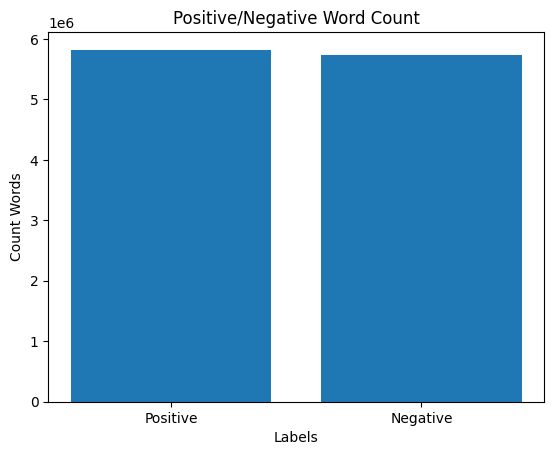

In [7]:
import time

def CountWords(data):
    i=0
    n=len(data)
    count_words_positive=0
    count_words_negative=0
    while i<n:
        row=data.iloc[i]
        if(row.sentiment=="positive"):
            count_words_positive+=len((row.review).split(' '))
        else:
            count_words_negative+=len((row.review).split(' '))
        i+=1
    return count_words_positive,count_words_negative
begin=time.time()
count_words_positive,count_words_negative=CountWords(data)
end=time.time()
print(f"Counting the Words in the Dataset is Finished Within {end-begin} Seconds")
print(f"{count_words_positive} Words Within Positive Sentiments Which is {count_words_positive/(count_words_positive+count_words_negative)}")
print(f"{count_words_negative} Words Within Negative Sentiments Which is {count_words_negative/(count_words_positive+count_words_negative)}")
labels = ['Positive', 'Negative']
nums = [count_words_positive, count_words_negative]

plt.bar(labels, nums)
plt.title('Positive/Negative Word Count')
plt.xlabel('Labels')
plt.ylabel('Count Words')
plt.show()



In [8]:
data['review'] = data['review'].str.lower()


Counting the Words in the Set is Finished Within 0.7329320907592773 Seconds
825178 Words Within Positive Sentiments Which is 0.4978296293749031
832373 Words Within Negative Sentiments Which is 0.502170370625097


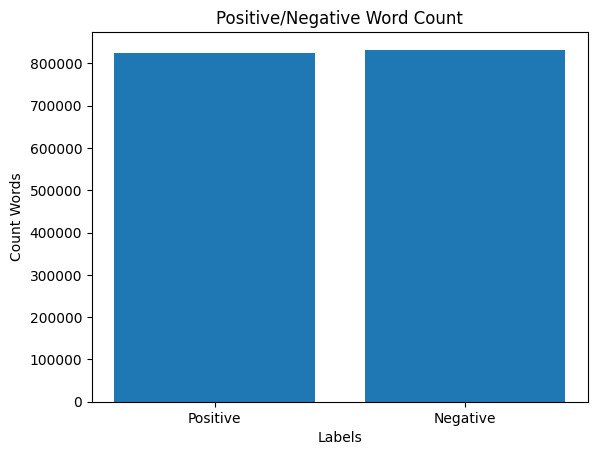

In [16]:
import pandas as pd
import re
import time
import matplotlib.pyplot as plt

f = open("english.txt", "r")
stop_words = f.read().splitlines()

import re
def removeSymbol(review):
    review = re.sub(r'[^a-zA-Z0-9\s]', ' ', review)
    return review



data['review']=data['review'].apply(removeSymbol)
def RemoveUnneccesaryWords(data,stop_words):
    list_to_be_removed = stop_words

    def clean_review(review):

        words = review.split()
        filtered_words = [word for word in words if word not in list_to_be_removed]

        return ' '.join(filtered_words)

    data['cleaned_review'] = data['review'].apply(clean_review)

    data['review'] = data['cleaned_review']
    data = data.drop(columns=['cleaned_review'])

    return data

data = RemoveUnneccesaryWords(data,stop_words)

begin = time.time()
count_words_positive, count_words_negative = CountWords(data)
end = time.time()

print(f"Counting the Words in the Set is Finished Within {end - begin} Seconds")
print(f"{count_words_positive} Words Within Positive Sentiments Which is {count_words_positive / (count_words_positive + count_words_negative)}")
print(f"{count_words_negative} Words Within Negative Sentiments Which is {count_words_negative / (count_words_positive + count_words_negative)}")

labels = ['Positive', 'Negative']
nums = [count_words_positive, count_words_negative]

plt.bar(labels, nums)
plt.title('Positive/Negative Word Count')
plt.xlabel('Labels')
plt.ylabel('Count Words')
plt.show()



In [17]:
from collections import Counter
import pandas as pd

def countWordFrequencyBySentiment(data):
    positive_reviews = ' '.join(data[data['sentiment'] == "positive"]['review'].tolist())
    negative_reviews = ' '.join(data[data['sentiment'] == 'negative']['review'].tolist())

    positive_words = positive_reviews.split()
    positive_frequencies = Counter(positive_words)
    positive_df = pd.DataFrame(positive_frequencies.items(), columns=['word', 'positive_frequency'])

    negative_words = negative_reviews.split()
    negative_frequencies = Counter(negative_words)
    negative_df = pd.DataFrame(negative_frequencies.items(), columns=['word', 'negative_frequency'])

    # Merge positive and negative frequencies
    word_frequencies_df = pd.merge(positive_df, negative_df, on='word', how='outer').fillna(0)
    word_frequencies_df['positive_frequency'] = word_frequencies_df['positive_frequency'].astype(int)
    word_frequencies_df['negative_frequency'] = word_frequencies_df['negative_frequency'].astype(int)

    # Sort by total frequency (optional)
    word_frequencies_df['frequency'] = (
        word_frequencies_df['positive_frequency'] + word_frequencies_df['negative_frequency']
    )
    word_frequencies_df = word_frequencies_df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

    return word_frequencies_df

all_words = countWordFrequencyBySentiment(data)


In [18]:
all_words

,word,positive_frequency,negative_frequency,frequency
0,movie,10671,14258,24929
1,film,11459,10526,21985
2,one,7440,7480,14920
3,like,4910,6463,11373
4,good,4113,4254,8367
...,...,...,...,...
49314,durang,0,1,1
49315,michaelangelo,0,1,1
49316,showstopper,0,1,1
49317,buckingham,1,0,1


In [19]:
further_stop_words=all_words[all_words['frequency']==1]
further_stop_words=list(further_stop_words['word'])

In [20]:
further_stop_words

['kasaba',
 'wreath',
 'associations',
 'katisha',
 'toothpaste',
 'topsy',
 'karlson',
 'thewes',
 'theyre',
 'awfull',
 'karzis',
 'toothless',
 'toothpicks',
 'harasses',
 'jett',
 'awes',
 'awls',
 'torched',
 'wreaks',
 'wrangles',
 'toprak',
 '270',
 '24p',
 'toothpick',
 'torah',
 'wraith',
 'kasch',
 'assimilated',
 'gorski',
 'jettisoning',
 '26th',
 'thesp',
 'hairdressers',
 'axing',
 'thinned',
 'jettisoned',
 'assimilates',
 'feld',
 'hairdryer',
 'feeders',
 'thet',
 'karishma',
 'harangued',
 'thinness',
 'awestruck',
 'thomajan',
 'kaspar',
 'wrackingly',
 'fin',
 'wreathed',
 'thety',
 'feint',
 'goldthwaits',
 'thew',
 'jesuit',
 'gossips',
 'thi',
 'asta',
 'kathak',
 'filmstock',
 'thieriot',
 'assuredness',
 'jewellers',
 'withdraws',
 'goldwait',
 'jetson',
 'torero',
 'kasugi',
 '2500',
 'topiary',
 'wrathful',
 'kathrine',
 'filmmuseum',
 'happosai',
 'wraparound',
 '80ish',
 'wowser',
 'awaking',
 'thirlby',
 'wrapper',
 'gossamer',
 'toreador',
 'feifer',
 'th

## This Cell Takes 108 minutes to run so the result is saved as a csv file
#### Quera Did not Authorize Uploads This Size Hence In Case There is a need to Get The "data_without_stopwords.csv" File You Can Download The File Via link Below
##### https://drive.google.com/file/d/1HrTPu0l0BpcSs2lP-tyAefLomJ5Unmif/view?usp=sharing



In [21]:
# data = RemoveUnneccesaryWords(data,further_stop_words)
data=pd.read_csv('data_without_stopwords.csv')


In [22]:
# data.to_csv("data_without_stopwords.csv")
all_words=all_words[all_words['frequency']!=1]


In [23]:
all_words

,word,positive_frequency,negative_frequency,frequency
0,movie,10671,14258,24929
1,film,11459,10526,21985
2,one,7440,7480,14920
3,like,4910,6463,11373
4,good,4113,4254,8367
...,...,...,...,...
37343,perfecting,1,1,2
37344,outwits,2,0,2
37345,groundless,0,2,2
37346,hissing,0,2,2


In [24]:
all_words['norm']=all_words.frequency/all_words.frequency.max()
def GroupWords(row):
    if(row>=0.1):
        return "high"
    elif(row>=0.1):
        return "mid"
    else:
        return "low"
all_words['rarity']=all_words['norm'].apply(GroupWords)

<ipython-input-24-f89946dc0d99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_words['norm']=all_words.frequency/all_words.frequency.max()
<ipython-input-24-f89946dc0d99>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_words['rarity']=all_words['norm'].apply(GroupWords)


In [25]:
all_words['p_n_ratio']=all_words['positive_frequency']/(all_words['negative_frequency']+1)

<ipython-input-25-5ab4ff6e9f62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_words['p_n_ratio']=all_words['positive_frequency']/(all_words['negative_frequency']+1)


In [26]:
word_to_p_n_ratio = all_words.set_index('word')['p_n_ratio'].to_dict()

def calculate_mean_p_n_ratio(review):
    words = review.lower().split()
    ratios = [word_to_p_n_ratio[word] for word in words if word in word_to_p_n_ratio]
    return sum(ratios) / len(ratios) if ratios else 0

data['mean_p_n_ratio'] = data['review'].apply(calculate_mean_p_n_ratio)



In [27]:
data_with_rarity=data.copy()
data_with_rarity

,review,sentiment,mean_p_n_ratio
0,one reviewers mentioned watching 1 oz episode ...,positive,1.162133
1,wonderful little production filming technique ...,positive,1.381289
2,thought wonderful way spend time hot summer we...,positive,1.192133
3,basically family little boy jake thinks zombie...,negative,0.903089
4,mattei love time money visually stunning film ...,positive,1.296312
...,...,...,...
36721,ok first ignore last person review admit falli...,positive,1.005370
36722,man stoked leave feedback 10 minutes romp love...,positive,1.339009
36723,every time think film feel physically ill read...,negative,1.018771
36724,first saw commercials greek questions going ap...,positive,1.063790


In [29]:
from collections import Counter

positive_reviews = data_with_rarity[data_with_rarity['sentiment'] == 'positive']['review']
negative_reviews = data_with_rarity[data_with_rarity['sentiment'] == 'negative']['review']

positive_word_counts = Counter(" ".join(positive_reviews).lower().split())
negative_word_counts = Counter(" ".join(negative_reviews).lower().split())

def assign_rarity(frequency, high_threshold, mid_threshold):
    if frequency >= high_threshold:
        return "high"
    elif frequency >= mid_threshold:
        return "mid"
    else:
        return "low"

high_threshold = 1000
mid_threshold = 100

positive_rarity = {word: assign_rarity(freq, high_threshold, mid_threshold) for word, freq in positive_word_counts.items()}
negative_rarity = {word: assign_rarity(freq, high_threshold, mid_threshold) for word, freq in negative_word_counts.items()}

def calculate_rarity_counts(row, rarity_level, sentiment_rarity):
    words = row.lower().split(" ") if isinstance(row, str) else []
    count = sum(1 for word in words if sentiment_rarity.get(word) == rarity_level)
    return count

data_with_rarity['high_rarity_positive'] = data_with_rarity['review'].apply(
    lambda row: calculate_rarity_counts(row, "high", positive_rarity)
)
data_with_rarity['mid_rarity_positive'] = data_with_rarity['review'].apply(
    lambda row: calculate_rarity_counts(row, "mid", positive_rarity)
)
data_with_rarity['low_rarity_positive'] = data_with_rarity['review'].apply(
    lambda row: calculate_rarity_counts(row, "low", positive_rarity)
)

data_with_rarity['high_rarity_negative'] = data_with_rarity['review'].apply(
    lambda row: calculate_rarity_counts(row, "high", negative_rarity)
)
data_with_rarity['mid_rarity_negative'] = data_with_rarity['review'].apply(
    lambda row: calculate_rarity_counts(row, "mid", negative_rarity)
)
data_with_rarity['low_rarity_negative'] = data_with_rarity['review'].apply(
    lambda row: calculate_rarity_counts(row, "low", negative_rarity)
)



In [30]:
data_with_rarity

,review,sentiment,mean_p_n_ratio,high_rarity_positive,mid_rarity_positive,low_rarity_positive,high_rarity_negative,mid_rarity_negative,low_rarity_negative
0,one reviewers mentioned watching 1 oz episode ...,positive,1.162133,51,71,41,48,60,53
1,wonderful little production filming technique ...,positive,1.381289,35,33,17,34,30,19
2,thought wonderful way spend time hot summer we...,positive,1.192133,33,39,13,33,39,12
3,basically family little boy jake thinks zombie...,negative,0.903089,26,29,11,26,27,13
4,mattei love time money visually stunning film ...,positive,1.296312,66,30,27,57,35,30
...,...,...,...,...,...,...,...,...,...
36721,ok first ignore last person review admit falli...,positive,1.005370,32,18,4,30,20,4
36722,man stoked leave feedback 10 minutes romp love...,positive,1.339009,26,29,15,23,32,13
36723,every time think film feel physically ill read...,negative,1.018771,39,35,17,40,38,15
36724,first saw commercials greek questions going ap...,positive,1.063790,91,75,38,86,72,45


In [31]:
data_with_rarity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36726 entries, 0 to 36725
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   review                36726 non-null  object 
 1   sentiment             36725 non-null  object 
 2   mean_p_n_ratio        36726 non-null  float64
 3   high_rarity_positive  36726 non-null  int64  
 4   mid_rarity_positive   36726 non-null  int64  
 5   low_rarity_positive   36726 non-null  int64  
 6   high_rarity_negative  36726 non-null  int64  
 7   mid_rarity_negative   36726 non-null  int64  
 8   low_rarity_negative   36726 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 2.8+ MB


In [32]:
data_with_rarity['total_word_count']=data_with_rarity['high_rarity_positive']+data_with_rarity['mid_rarity_positive']+data_with_rarity['low_rarity_positive']+data_with_rarity['high_rarity_negative']+data_with_rarity['mid_rarity_negative']+data_with_rarity['low_rarity_negative']
positive_reviews = data_with_rarity[data_with_rarity['sentiment'] == 'positive']
negative_reviews = data_with_rarity[data_with_rarity['sentiment'] == 'negative']

positive_quartiles = np.percentile(positive_reviews['total_word_count'], [25, 50, 75])
negative_quartiles = np.percentile(negative_reviews['total_word_count'], [25, 50, 75])

def assign_quartile(row, quartiles):
    if row <= quartiles[0]:
        return 'Q1'
    elif row <= quartiles[1]:
        return 'Q2'
    elif row <= quartiles[2]:
        return 'Q3'
    else:
        return 'Q4'

positive_reviews['quartile'] = positive_reviews['total_word_count'].apply(
    lambda x: assign_quartile(x, positive_quartiles)
)
negative_reviews['quartile'] = negative_reviews['total_word_count'].apply(
    lambda x: assign_quartile(x, negative_quartiles)
)

def sample_reviews(reviews, total_samples, q1_ratio, q2_q3_ratio, q4_ratio):
    q1_samples = int(total_samples * q1_ratio)
    q2_q3_samples = int(total_samples * q2_q3_ratio)
    q4_samples = total_samples - q1_samples - q2_q3_samples

    q2_samples = q3_samples = q2_q3_samples // 2

    sampled_reviews = pd.concat([
        reviews[reviews['quartile'] == 'Q1'].sample(n=min(q1_samples, len(reviews[reviews['quartile'] == 'Q1'])), random_state=42),
        reviews[reviews['quartile'] == 'Q2'].sample(n=min(q2_samples, len(reviews[reviews['quartile'] == 'Q2'])), random_state=42),
        reviews[reviews['quartile'] == 'Q3'].sample(n=min(q3_samples, len(reviews[reviews['quartile'] == 'Q3'])), random_state=42),
        reviews[reviews['quartile'] == 'Q4'].sample(n=min(q4_samples, len(reviews[reviews['quartile'] == 'Q4'])), random_state=42)
    ])
    return sampled_reviews

negative_sampled = sample_reviews(negative_reviews, total_samples=12500, q1_ratio=0.25, q2_q3_ratio=0.5, q4_ratio=0.25)

positive_sampled = sample_reviews(positive_reviews, total_samples=12500, q1_ratio=0.25, q2_q3_ratio=0.5, q4_ratio=0.25)

data_with_rarity = pd.concat([negative_sampled, positive_sampled])



<ipython-input-32-0d94329fe832>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['quartile'] = positive_reviews['total_word_count'].apply(
<ipython-input-32-0d94329fe832>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['quartile'] = negative_reviews['total_word_count'].apply(


In [33]:
data_with_rarity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 9668 to 2973
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   review                25000 non-null  object 
 1   sentiment             25000 non-null  object 
 2   mean_p_n_ratio        25000 non-null  float64
 3   high_rarity_positive  25000 non-null  int64  
 4   mid_rarity_positive   25000 non-null  int64  
 5   low_rarity_positive   25000 non-null  int64  
 6   high_rarity_negative  25000 non-null  int64  
 7   mid_rarity_negative   25000 non-null  int64  
 8   low_rarity_negative   25000 non-null  int64  
 9   total_word_count      25000 non-null  int64  
 10  quartile              25000 non-null  object 
dtypes: float64(1), int64(7), object(3)
memory usage: 2.3+ MB


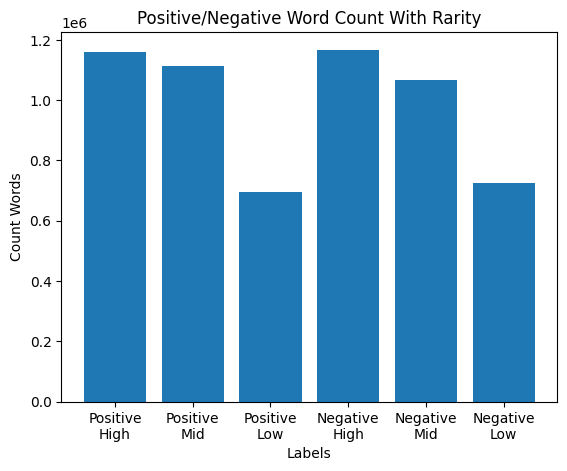

In [34]:
labels = ['Positive\nHigh','Positive\nMid','Positive\nLow','Negative\nHigh','Negative\nMid', 'Negative\nLow']
count_words=[sum(data_with_rarity['high_rarity_positive']),sum(data_with_rarity['mid_rarity_positive']),sum(data_with_rarity['low_rarity_positive']),sum(data_with_rarity['high_rarity_negative']),sum(data_with_rarity['mid_rarity_negative']),sum(data_with_rarity['low_rarity_negative'])]

plt.bar(labels, count_words)
plt.title('Positive/Negative Word Count With Rarity')
plt.xlabel('Labels')
plt.ylabel('Count Words')
plt.show()



In [35]:
data=(data_with_rarity.drop(columns='quartile')).copy()
feature_matrix=data_with_rarity.copy()
feature_matrix.drop(columns=['sentiment','quartile'],inplace=True)

In [36]:
data_with_review=data.copy()
data=data.drop(columns=['review'])


In [37]:
data['sentiment'] = data['sentiment'].apply(lambda x: 1 if x == "positive" else 0)

In [38]:
data['positive']=data['high_rarity_positive']+data['mid_rarity_positive']+data['low_rarity_positive']
data['negative']=data['high_rarity_negative']+data['mid_rarity_negative']+data['low_rarity_negative']

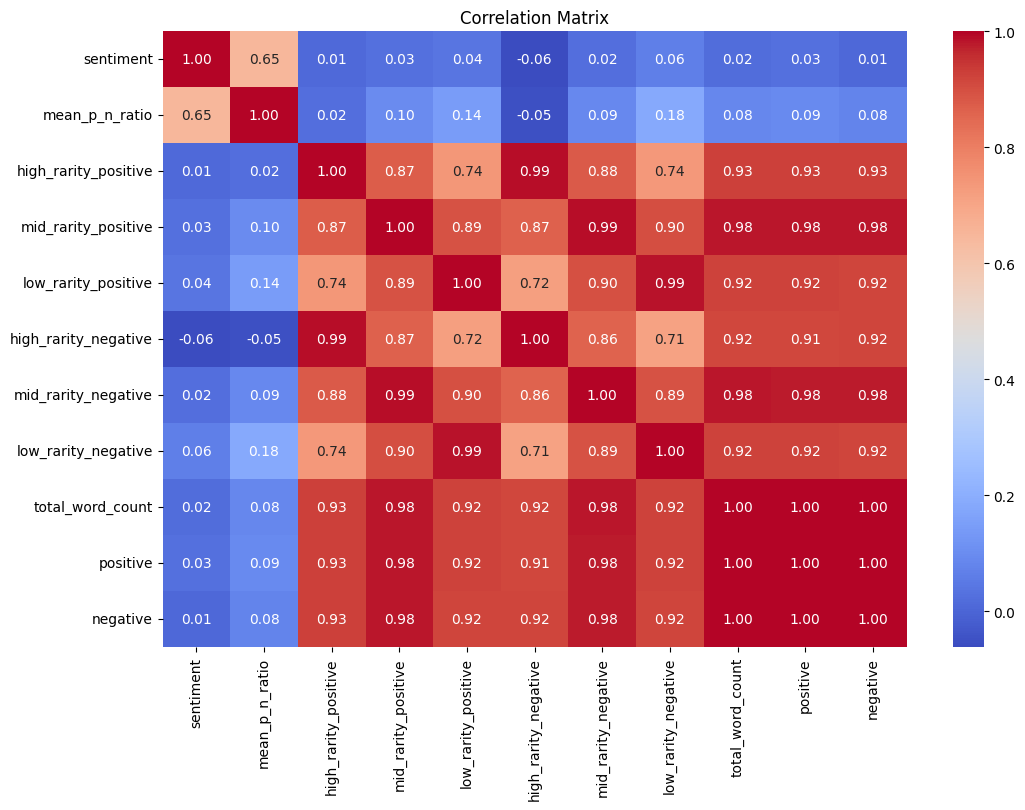

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()
threshold = 0.8
strong_correlation = correlation_matrix[(correlation_matrix > threshold) & (correlation_matrix != 1.0)]


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(data.drop(columns='sentiment'),data['sentiment'],train_size=0.8,random_state=104)

In [42]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input

def neural_network_model(X_train, y_train, X_val, y_val):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),


        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(
        x_train, y_train,
        validation_data=(x_val, y_val),
        epochs=50,
        batch_size=32,
        verbose=1
    )

    y_pred = (model.predict(X_val) > 0.5).astype('int32')

    f1 = f1_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)

    return f1, precision, recall, accuracy, history, y_val, y_pred

f1_nn, precision_nn, recall_nn, accuracy_nn, history, y_true_nn, y_pred_nn  = neural_network_model(x_train, y_train, x_val, y_val)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7844 - loss: 0.4873 - val_accuracy: 0.8748 - val_loss: 0.3287
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8582 - loss: 0.3463 - val_accuracy: 0.8758 - val_loss: 0.3086
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8546 - loss: 0.3494 - val_accuracy: 0.8770 - val_loss: 0.3031
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8607 - loss: 0.3356 - val_accuracy: 0.8738 - val_loss: 0.3087
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8663 - loss: 0.3310 - val_accuracy: 0.8684 - val_loss: 0.3148
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8716 - loss: 0.3163 - val_accuracy: 0.8804 - val_loss: 0.2973
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8663 - loss: 0.3254 - val_accuracy: 0.8810 - val_loss: 0.3006
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8666 - loss: 0.3214 - val_accuracy: 0.

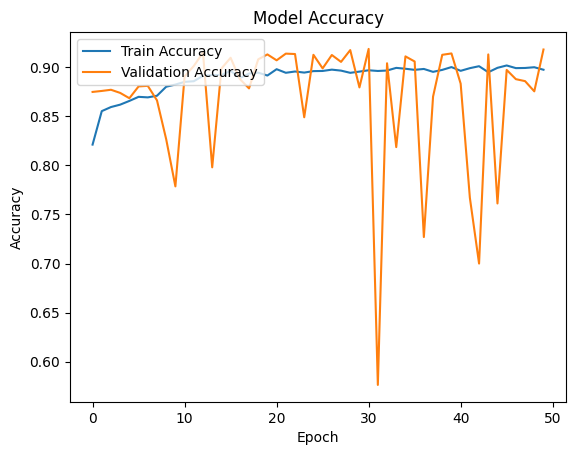

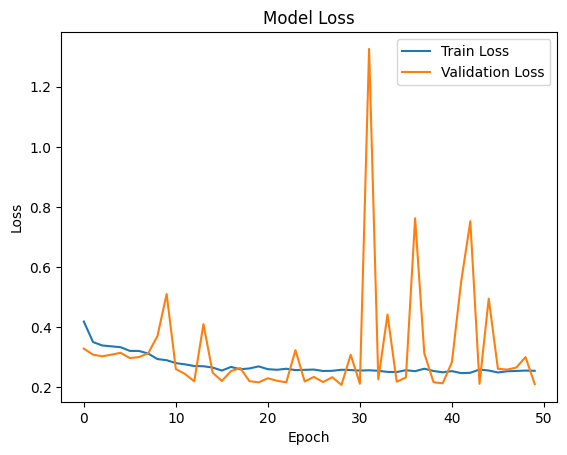

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [44]:
from sklearn.naive_bayes import MultinomialNB

def naive_bayes_model(X_train, y_train, X_val, y_val):
    model = MultinomialNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    f1 = f1_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)

    return f1, precision, recall, accuracy, y_val, y_pred

f1_nb, precision_nb, recall_nb, accuracy_nb,y_true_nb,y_pred_nb = naive_bayes_model(x_train, y_train, x_val, y_val)


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def logistic_regression_model(X_train, y_train, X_val, y_val):
    model = make_pipeline(StandardScaler(), LogisticRegression())
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    f1 = f1_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)

    return f1, precision, recall, accuracy, y_val, y_pred

f1_lr, precision_lr, recall_lr, accuracy_lr,y_true_lr,y_pred_lr = logistic_regression_model(x_train, y_train, x_val, y_val)


In [46]:
metrics = {
    'Model': ['Naive Bayes', 'Logistic Regression', 'Neural Network'],
    'F1 Score': [f1_nb*100, f1_lr*100, f1_nn*100],
    'Precision': [precision_nb*100, precision_lr*100, precision_nn*100],
    'Recall': [recall_nb*100, recall_lr*100, recall_nn*100],
    'Accuracy': [accuracy_nb*100, accuracy_lr*100, accuracy_nn*100],
}

comparison_df = pd.DataFrame(metrics)
comparison_df

,Model,F1 Score,Precision,Recall,Accuracy
0,Naive Bayes,69.623608,61.716792,79.854074,65.62
1,Logistic Regression,90.274928,91.400083,89.177138,90.52
2,Neural Network,91.730537,91.288639,92.176733,91.80


In [47]:
def confusion_matrix(y_true, y_pred):
    tp = sum((np.array(y_true) == 1) & (np.array(y_pred) == 1))
    tn = sum((np.array(y_true) == 0) & (np.array(y_pred) == 0))
    fp = sum((np.array(y_true) == 0) & (np.array(y_pred) == 1))
    fn = sum((np.array(y_true) == 1) & (np.array(y_pred) == 0))
    return np.array([[tn, fp], [fn, tp]])

conf_matrix_nb = confusion_matrix(y_true_nb, y_pred_nb)
conf_matrix_lr = confusion_matrix(y_true_lr, y_pred_lr)
conf_matrix_nn = confusion_matrix(y_true_nn, (y_pred_nn.reshape(1,5000))[0])


In [48]:
print("Confusion Matrix - Naive Bayes:")
print(pd.DataFrame(conf_matrix_nb, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))

print("\nConfusion Matrix - Logistic Regression:")
print(pd.DataFrame(conf_matrix_lr, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))

print("\nConfusion Matrix - Neural Network:")
print(pd.DataFrame(conf_matrix_nn, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1']))

Confusion Matrix - Naive Bayes:
          Predicted 0  Predicted 1
Actual 0         1311         1222
Actual 1          497         1970

Confusion Matrix - Logistic Regression:
          Predicted 0  Predicted 1
Actual 0         2326          207
Actual 1          267         2200

Confusion Matrix - Neural Network:
          Predicted 0  Predicted 1
Actual 0         2316          217
Actual 1          193         2274
